<a href="https://colab.research.google.com/github/NathVM/GA/blob/main/NXGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring performance of Graph Analytics Algorithms using NetworkX graphs

Imports : 

In [13]:
import networkx as nx
import pandas as pd
import timeit

Dataset: 

https://networkrepository.com/TWITTER-Real-Graph-Partial.php

Shared in the google drive : 

https://drive.google.com/drive/folders/113gZK1io1MZGogAULYoBdrlEUHyJcxRh?usp=sharing 

---



In [14]:
from google.colab import drive
drive.mount('/content/drive')

# Map the shared folder 
# https://drive.google.com/drive/folders/113gZK1io1MZGogAULYoBdrlEUHyJcxRh?usp=sharing 
# to your google drive and modify the file path accordingly
file = "/content/drive/MyDrive/Dataset/share/GA/TWITTER-Real-Graph-Partial.edges"
df = pd.read_csv(file)
df.rename(columns = {'1':'source', '2':'target'}, inplace = True)
print(df.head(100))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    source  target
0        2       1
1        3       4
2        4       3
3        3       2
4        2       3
..     ...     ...
95      52      56
96      56      52
97      53      57
98      57      53
99      53      59

[100 rows x 2 columns]


Create graph: 

---



In [ ]:
g = nx.from_pandas_edgelist(df,'source','target')

**Path Analytics:**

In [16]:
source = 357908
start_time = timeit.default_timer()
for target in g.nodes():
    if target != source:
      try: 
        shortest_paths = nx.all_shortest_paths(g, source, target)
        #print(f"Shortest paths from {source} to {target}: {list(shortest_paths)}")
      except nx.NetworkXNoPath: 
        pass 
      
elapsed = timeit.default_timer() - start_time
print("Time taken for nx.all_shortest_paths = ", elapsed, "seconds")

Time taken for nx.all_shortest_paths =  3.2729714499998863 seconds


Time taken for SSSP =  3.2729714499998863 seconds

**Centrality Analytics:**

In [ ]:
start_time = timeit.default_timer()

degree_centrality = nx.degree_centrality(g) #dictionary for every nodes 
elapsed = timeit.default_timer() - start_time
print("Time Taken for degree centrality : ", elapsed)

Time Taken for degree centrality :  0.3176729679107666

In [ ]:
start_time = timeit.default_timer()

closeness_centrality = nx.closeness_centrality(g)
elapsed = timeit.default_timer() - start_time
print("Time Taken for closeness centrality : ", elapsed)

Time Taken for closeness centrality :  5.306373834609985

In [ ]:
start_time = timeit.default_timer()

betweenness_centrality = nx.betweenness_centrality(g)
elapsed = timeit.default_timer() - start_time
print("Time Taken for between centrality : ", elapsed)

Time Taken for between centrality :  Timeout occurred running in Colab.

**Community Analytics:**

In [ ]:
start_time = timeit.default_timer()
num_triangles = nx.triangles(g)
elapsed = timeit.default_timer() - start_time
print("Time taken for nx.triangles = ", elapsed, "seconds")
random_node = 14
print("Number of triangles at random node [", random_node , "] = ", num_triangles.get(random_node))

Time taken for nx.triangles =  5.03612642600001 seconds

Number of triangles at random node [ 14 ] =  2

In [ ]:
start_time = timeit.default_timer()
clustering_coeff = nx.clustering(g)
elapsed = timeit.default_timer() - start_time
print("Time taken for nx.clustering = ", elapsed, "seconds")
random_node = 51
print("Clustring coefficient of random node [", random_node , "] = ", clustering_coeff.get(random_node))

Time taken for nx.clustering =  6.657467489999817 seconds

Clustring coefficient of random node [ 51 ] =  0.42857142857142855

In [ ]:
start_time = timeit.default_timer()
communities = nx_comm.louvain_communities(g)
elapsed = timeit.default_timer() - start_time
print("Time taken for nx_comm.louvain_communities = ", elapsed, "seconds")
print("No. of communities identified = ", len(communities))

Time taken for nx_comm.louvain_communities =  60.146344770999804 seconds

No. of communities identified =  147179

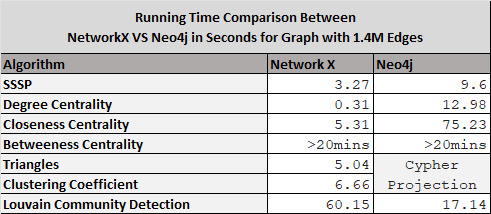